In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_clipboard()

In [3]:
data = data.rename(columns={"type": "Memory Type"})
data.columns

Index(['Start Time', 'Duration', 'Run ID', 'Name', 'Source Type',
       'Source Name', 'User', 'Status', 'block_size', 'git_commit_hash',
       'grid_size', 'number_of_beams', 'process_name',
       'achieved_active_warps_per_sm', 'achieved_occupancy',
       'compute_throughput', 'duration', 'l1_cache_throughput',
       'l2_cache_throughput', 'l2_hit_rate', 'memory_throughput',
       'registers_per_thread', 'theoretical_active_warps_per_sm',
       'theoretical_occupancy', 'Memory Type'],
      dtype='object')

In [13]:
SAVE_FIG = True

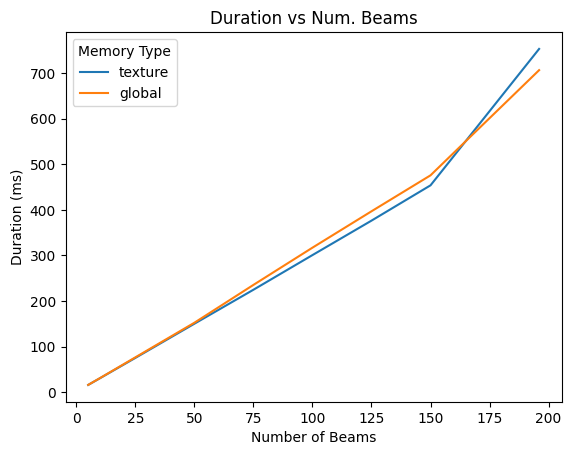

In [14]:
ax = sns.lineplot(data, x='number_of_beams', y='duration', hue='Memory Type')
plt.title("Duration vs Num. Beams")
ax.set_xlabel("Number of Beams")
ax.set_ylabel("Duration (ms)")
if SAVE_FIG:
    plt.savefig("plots/duration_vs_num_beams.png")

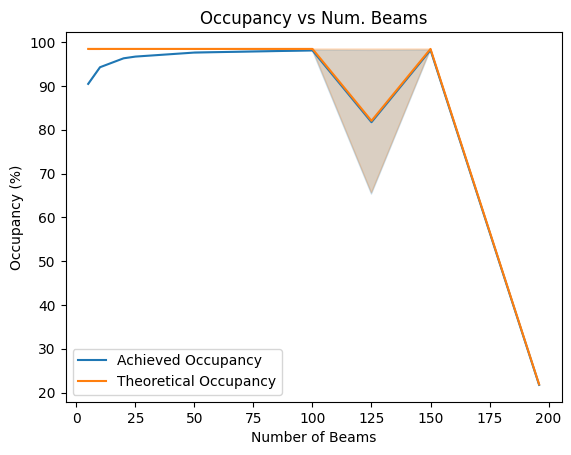

In [15]:
ax = sns.lineplot(data, x='number_of_beams', y='achieved_occupancy', label="Achieved Occupancy")
sns.lineplot(data, x="number_of_beams", y='theoretical_occupancy', label = "Theoretical Occupancy")
plt.title("Occupancy vs Num. Beams")
ax.set_xlabel("Number of Beams")
ax.set_ylabel("Occupancy (%)")

if SAVE_FIG:
    plt.savefig("plots/occupancy_vs_num_beams.png")

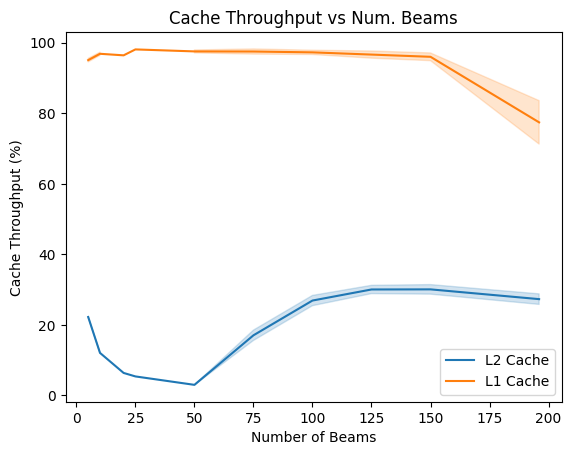

In [16]:
ax = sns.lineplot(data, x='number_of_beams', y='l2_cache_throughput', label="L2 Cache")
sns.lineplot(data, x="number_of_beams", y='l1_cache_throughput', label = "L1 Cache")
plt.title("Cache Throughput vs Num. Beams")
ax.set_xlabel("Number of Beams")
ax.set_ylabel("Cache Throughput (%)")

if SAVE_FIG:
    plt.savefig("plots/cache_throughput_vs_num_beams.png")

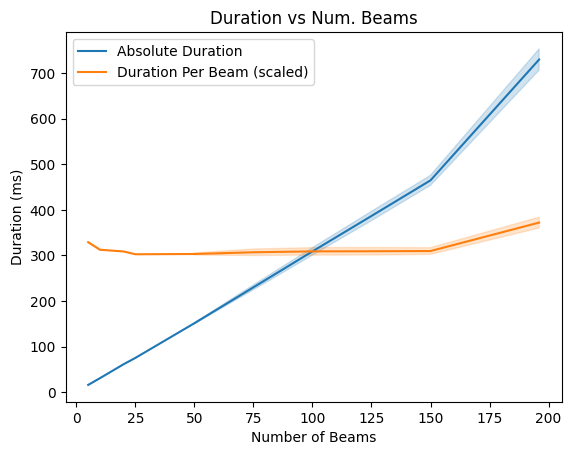

In [17]:
data['duration_per_beam'] = 100 * data['duration'] / data['number_of_beams']

ax = sns.lineplot(data, x='number_of_beams', y='duration', label="Absolute Duration")
sns.lineplot(data, x="number_of_beams", y='duration_per_beam', label = "Duration Per Beam (scaled)")
plt.title("Duration vs Num. Beams")
ax.set_xlabel("Number of Beams")
ax.set_ylabel("Duration (ms)")

if SAVE_FIG:
    plt.savefig("plots/duration_per_beam_vs_num_beams.png")

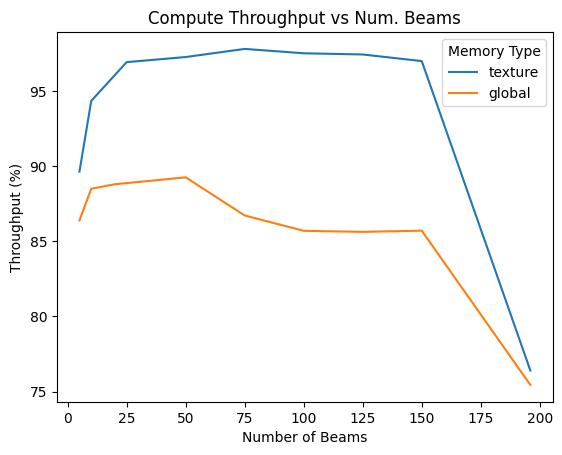

In [18]:
ax = sns.lineplot(data, x='number_of_beams', y='compute_throughput', hue="Memory Type")


#sns.lineplot(data, x="number_of_beams", y='compute_throughput', label = "Compute Throughput")



plt.title("Compute Throughput vs Num. Beams")
ax.set_xlabel("Number of Beams")
ax.set_ylabel("Throughput (%)")
if SAVE_FIG:
    plt.savefig("plots/compute_throughput_vs_num_beams.png")

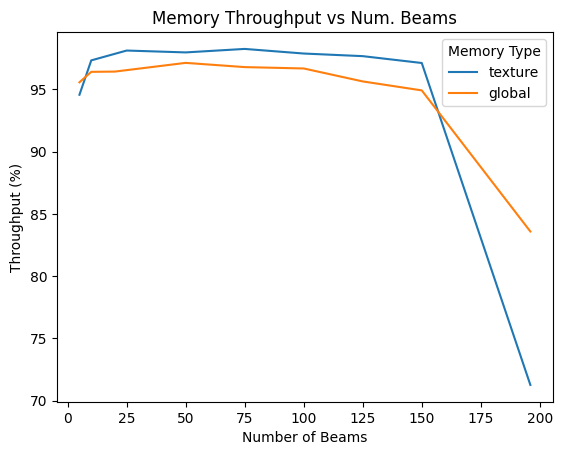

In [19]:
ax = sns.lineplot(data, x='number_of_beams', y='memory_throughput', hue="Memory Type")


#sns.lineplot(data, x="number_of_beams", y='compute_throughput', label = "Compute Throughput")



plt.title("Memory Throughput vs Num. Beams")
ax.set_xlabel("Number of Beams")
ax.set_ylabel("Throughput (%)")
if SAVE_FIG:
    plt.savefig("plots/memory_throughput_vs_num_beams.png")